<a href="https://colab.research.google.com/github/DavidJimenez10/CV-Deep-Learning/blob/main/EDA_Unity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/jpmiller/basic-eda-with-images


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import os
import json
from itertools import combinations

In [ ]:
folder_path = "//content//"
files = os.listdir(folder_path)
files = [file for file in files if file.endswith(".json")]
aux = ""
for file in files:
  file_path = os.path.join(folder_path,file)
  with open(file_path,'r') as f:
    json_captures = json.load(f)

  json_captures = json_captures['captures']
  
  #Obtener capturas o bounding box por archivo
  for capture in json_captures:
    #Se enumeran las anotaciones para añadir el numero al archivo json, pues la llave del json no puede repetirse
    for i,bounding_box in enumerate(capture["annotations"][0]["values"]):
      aux += f'"{i}_{capture["filename"]}":{json.dumps(bounding_box)},'
  
json_captures = "{" + aux + "}"
print(json_captures)

{"0_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 14, "x": 225.0, "y": 0.0, "width": 172.0, "height": 214.0},"1_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 16, "x": 499.0, "y": 35.0, "width": 175.0, "height": 238.0},"2_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 17, "x": 293.0, "y": 179.0, "width": 157.0, "height": 213.0},"3_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 4, "label_name": "greentea", "instance_id": 5, "x": 146.0, "y": 255.0, "width": 65.0, "height": 182.0},"4_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 15, "x": 449.0, "y": 268.0, "width": 114.0, "height": 247.0},"5_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 2, "label_name": "milk", "instance_id": 6, "x": 214.0, "y": 5

In [ ]:
json_captures

'{"0_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 14, "x": 225.0, "y": 0.0, "width": 172.0, "height": 214.0},"1_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 16, "x": 499.0, "y": 35.0, "width": 175.0, "height": 238.0},"2_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 17, "x": 293.0, "y": 179.0, "width": 157.0, "height": 213.0},"3_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 4, "label_name": "greentea", "instance_id": 5, "x": 146.0, "y": 255.0, "width": 65.0, "height": 182.0},"4_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 5, "label_name": "detergent", "instance_id": 15, "x": 449.0, "y": 268.0, "width": 114.0, "height": 247.0},"5_RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png":{"label_id": 2, "label_name": "milk", "instance_id": 6, "x": 214.0, "y": 

In [ ]:
#Traformando json string a dataframe 
df_captures = pd.read_json(json_captures,orient='index')

In [ ]:
df_captures['size'] = df_captures['width']*df_captures['height']
df_captures['centroid_y'] = df_captures['height']/2 + df_captures['y']
df_captures['centroid_x'] = df_captures['width']/2 + df_captures['x']

In [ ]:
#Tamaño maximo objeto
ser_max_size = df_captures.groupby('label_name')['size'].max()
ser_max_size

label_name
detergent     52664
greentea      23004
lasagne      301056
lotion        32538
milk          15748
Name: size, dtype: int64

In [ ]:
for articulo,max_size in zip(ser_max_size.index,ser_max_size):
  df_captures.loc[df_captures['label_name'] == articulo,'nomalize_size'] =  df_captures['size']/max_size

In [ ]:
df_captures.index.name='file'
#Quitando los 2 primer caracteres de los indices
df_captures.rename(lambda x : x[2:],inplace=True)

In [ ]:
df_captures.head()

,label_id,label_name,instance_id,x,y,width,height,size,centroid_y,centroid_x,nomalize_size
file,,,,,,,,,,,
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png,5,detergent,14,225,0,172,214,36808,107.0,311.0,0.698921
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png,5,detergent,16,499,35,175,238,41650,154.0,586.5,0.790863
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png,5,detergent,17,293,179,157,213,33441,285.5,371.5,0.634988
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png,4,greentea,5,146,255,65,182,11830,346.0,178.5,0.514258
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_152.png,5,detergent,15,449,268,114,247,28158,391.5,506.0,0.534673


In [ ]:
print(f'El dataset contiene {df_captures.shape[0]} objetos o bounding boxes')
print(f'Se tiene un total de {len(df_captures.index.unique())} imagenes')

El dataset contiene 1817 objetos o bounding boxes
Se tiene un total de 251 imagenes


In [ ]:
#Datafram con la cantidad total de objetos por imagen
num_objetos_imagen = df_captures.groupby('file').size().rename("num_objetos").to_frame()
num_objetos_imagen.head()

,num_objetos
file,
B099a6211-509d-4405-83eb-2e82e756f618/rgb_10.png,5
B099a6211-509d-4405-83eb-2e82e756f618/rgb_100.png,7
B099a6211-509d-4405-83eb-2e82e756f618/rgb_101.png,8
B099a6211-509d-4405-83eb-2e82e756f618/rgb_102.png,9
B099a6211-509d-4405-83eb-2e82e756f618/rgb_103.png,9


In [ ]:
#Datafram con la cantidad total de objetos por imagen
num_mismo_objetos_imagen = df_captures.groupby(['file','label_name']).size().rename("num_mismo_objeto").to_frame()
num_mismo_objetos_imagen.head()

num_mismo_objeto
file                                               label_name                  
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_10.png detergent                  1
                                                   greentea                   1
                                                   milk                       3
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_100... detergent                  2
                                                   greentea                   1

In [ ]:
objetos_imagen = df_captures.groupby('file')['label_name'].unique().to_frame()
objetos_imagen

,label_name
file,
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_10.png,"[milk, greentea, detergent]"
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_100.png,"[detergent, lotion, lasagne, greentea]"
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_101.png,"[greentea, detergent, lotion, milk, lasagne]"
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_102.png,"[milk, lotion, lasagne, detergent, greentea]"
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_103.png,"[lotion, greentea, milk, lasagne, detergent]"
...,...
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_96.png,"[milk, greentea, detergent, lasagne]"
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_97.png,"[milk, detergent]"
RGB099a6211-509d-4405-83eb-2e82e756f618/rgb_98.png,"[greentea, lotion, detergent, milk, lasagne]"


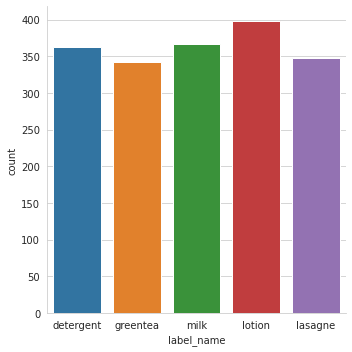

In [ ]:
#Numero de apariciones de cada objeto en el dataset
sns.catplot(x="label_name", kind="count", data=df_captures)

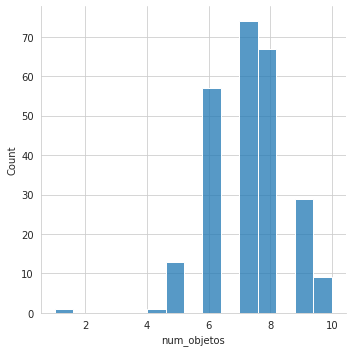

In [ ]:
#Distribucion numero de objetos por imagen
sns.displot(num_objetos_imagen, x="num_objetos")

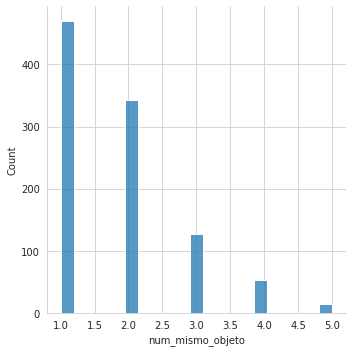

In [ ]:
#Distribucion numero apariciones mismo objeto por imagen
sns.displot(num_mismo_objetos_imagen, x="num_mismo_objeto")

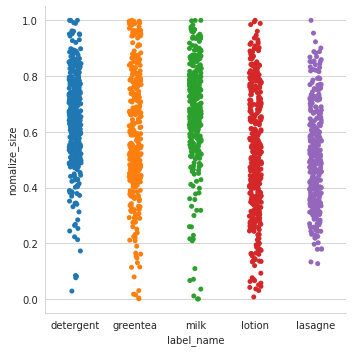

In [ ]:
#Distribucion de escalas de tamaño en los objetos
sns.catplot(x="label_name", y="nomalize_size", data=df_captures)

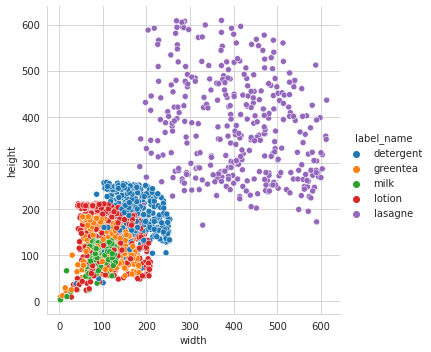

In [ ]:
#Tamaño de los objetos
sns.relplot(x="width", y="height", hue='label_name', data=df_captures)

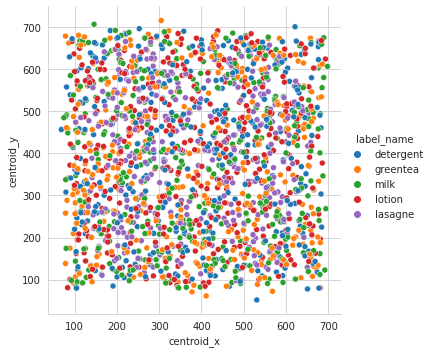

In [ ]:
#Ubicacion del centroide de los objetos
sns.relplot(x="centroid_x", y="centroid_y", hue='label_name', data=df_captures)